# Can we predict whether someone will purchase a bike?

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Cleaning the Data

In [3]:
bike_data = pd.read_csv('AdvWorksCusts.csv')
monthly_spend = pd.read_csv('AW_AveMonthSpend.csv')
bought_or_not = pd.read_csv('AW_BikeBuyer.csv')

In [4]:
bike_data.head()
bike_data.shape
bike_data.CustomerID.unique().shape

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771


(16519, 23)

(16404,)

Clearly have duplicates in the CustomerID column. Told to retain the latest entries of any duplicates.

In [5]:
bike_data.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)
bike_data = bike_data.reset_index(drop=True)
bike_data.shape
bike_data.CustomerID.unique().shape

(16404, 23)

(16404,)

In [6]:
bike_data.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771


Next we want to see how many columns have missing values. Keeping in mind that our data currently has 16404 rows.

In [7]:
bike_data.isna().sum()


CustomerID                  0
Title                   16316
FirstName                   0
MiddleName               6951
LastName                    0
Suffix                  16402
AddressLine1                0
AddressLine2            16131
City                        0
StateProvinceName           0
CountryRegionName           0
PostalCode                  0
PhoneNumber                 0
BirthDate                   0
Education                   0
Occupation                  0
Gender                      0
MaritalStatus               0
HomeOwnerFlag               0
NumberCarsOwned             0
NumberChildrenAtHome        0
TotalChildren               0
YearlyIncome                0
dtype: int64

The columns 'Title', 'Suffix' and 'AddressLine2' have an overwhelming amount of missing values. 
'MiddleName' is also missing a lot of values.
As a result, these four columns that contain missing values need to be removed.

In [8]:
columns_to_drop = ['Title', 'Suffix', 'AddressLine2', 'MiddleName']
bike_data.drop(columns_to_drop, inplace = True, axis = 1)


In [9]:
#bike_data.head()
bike_data.isna().sum()
bike_data.shape
bike_data.dtypes

CustomerID              0
FirstName               0
LastName                0
AddressLine1            0
City                    0
StateProvinceName       0
CountryRegionName       0
PostalCode              0
PhoneNumber             0
BirthDate               0
Education               0
Occupation              0
Gender                  0
MaritalStatus           0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
TotalChildren           0
YearlyIncome            0
dtype: int64

(16404, 19)

CustomerID               int64
FirstName               object
LastName                object
AddressLine1            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
dtype: object

Next we need to concat the other 2 dataframes, but maintain the unique CustomerID entries we currently have.

Plan is to first check and remove any duplicates in the remaining 2 dataframes.

In [10]:
monthly_spend.shape
monthly_spend.CustomerID.unique().shape
monthly_spend.head()

(16519, 2)

(16404,)

,CustomerID,AveMonthSpend
0,11000,89
1,11001,117
2,11002,123
3,11003,50
4,11004,95


There are duplicates in the monthly_spend dataframe, thus the duplicates will be removed, with only the latest 
entries remaining. 

In [11]:
monthly_spend.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)
monthly_spend = monthly_spend.reset_index(drop = True)
monthly_spend.shape
monthly_spend.CustomerID.unique().shape

(16404, 2)

(16404,)

Similarly, the duplicates in the bought_or_not dataframe are also removed.

In [12]:
bought_or_not.shape
bought_or_not.CustomerID.unique().shape
bought_or_not.head()

(16519, 2)

(16404,)

,CustomerID,BikeBuyer
0,11000,0
1,11001,1
2,11002,0
3,11003,0
4,11004,1


In [13]:
bought_or_not.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)
bought_or_not = bought_or_not.reset_index(drop=True)
bought_or_not.shape
bought_or_not.CustomerID.unique().shape

(16404, 2)

(16404,)

The three dataframes "bike_data", "monthly_spend" and "bought_or_not" now all contain 16404 rows.
As such, they are ready to be concatenated.

In [14]:
bike = pd.merge(bike_data, monthly_spend, on = 'CustomerID')
bike = pd.merge(bike, bought_or_not, on = 'CustomerID')
bike.head()
bike.shape


,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,...,Professional,M,M,1,0,0,2,137947,89,0
1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,...,Professional,M,S,0,1,3,3,101141,117,1
2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,...,Professional,M,M,1,1,3,3,91945,123,0
3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,...,Professional,F,S,0,1,0,0,86688,50,0
4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,...,Professional,F,S,1,4,5,5,92771,95,1


(16404, 21)

In [15]:
bike.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
count,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000
mean,20240.143136,0.674104,1.499756,0.991100,2.004511,78129.672397,72.391002,0.332541
std,5340.370705,0.468723,1.139135,1.514278,1.682318,39728.383493,27.269921,0.471138
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000,22.000000,0.000000
25%,15617.750000,0.000000,1.000000,0.000000,0.000000,47808.750000,52.000000,0.000000
50%,20231.500000,1.000000,2.000000,0.000000,2.000000,76125.000000,68.000000,0.000000
75%,24862.250000,1.000000,2.000000,2.000000,3.000000,105211.750000,84.000000,1.000000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000,176.000000,1.000000


Want to check for class imbalance

In [16]:
for x in bike:
    bike[x].value_counts()

14329    1
23662    1
13091    1
15138    1
11040    1
21279    1
23326    1
17181    1
19228    1
29467    1
25369    1
27416    1
13075    1
15122    1
11024    1
21263    1
23310    1
17165    1
19212    1
29451    1
25353    1
13059    1
15106    1
11008    1
21247    1
23294    1
17149    1
19196    1
29435    1
25337    1
        ..
25974    1
23953    1
21904    1
15757    1
13708    1
28039    1
25990    1
19843    1
17794    1
23937    1
21888    1
11647    1
15741    1
13692    1
19827    1
13660    1
17778    1
21872    1
11631    1
15725    1
13676    1
28007    1
25958    1
19811    1
17762    1
23905    1
21856    1
11615    1
15709    1
12294    1
Name: CustomerID, Length: 16404, dtype: int64

Jennifer      87
Richard       86
Dalton        85
Eduardo       85
Isabella      85
Lucas         85
Katherine     85
Marcus        84
Morgan        84
Alexandra     82
Sydney        81
Kaitlyn       79
Natalie       79
Chloe         78
Xavier        77
Julia         77
Seth          76
Ian           76
Devin         72
James         72
Thomas        71
Jessica       68
Jose          68
Abigail       67
Miguel        67
Jordan        66
Rachel        66
Wyatt         65
Samuel        65
Edward        65
              ..
Kirk           1
Stuart         1
Alexandre      1
César          1
Florian        1
Vadim          1
Lloyd          1
Ben            1
Rakesh         1
Masato         1
Peggy          1
Giorgio        1
Desirée        1
Janice         1
Dave           1
Pearlie        1
Marty          1
Irving         1
Mikael         1
Mike           1
Scot           1
Shirleen       1
Giraldo        1
Anders         1
Liz            1
Lane           1
Juha-Pekka     1
Ralph         

Diaz           190
Hernandez      161
Perez          153
Xu             151
Martinez       151
Torres         151
Sanchez        149
Gonzalez       148
Martin         147
Lopez          147
Rodriguez      146
Garcia         141
Lal            118
Shan           116
Jai            113
Kumar          113
Ross           113
Bryant         109
Sharma         109
Powell         108
Coleman        108
Russell        107
Gonzales       107
Griffin        106
Perry          106
Long           105
Flores         104
Jenkins        104
Washington     103
Butler         102
              ... 
Posti            1
Wedge            1
Rothkugel        1
Schulte          1
Agbonile         1
Ptaszynski       1
Pulipalyam       1
Slattengren      1
Severino         1
Ruggiero         1
Louverdis        1
Rockne           1
Sacksteder       1
Yong             1
Cannata          1
Rusko            1
Belson           1
Pais             1
Sherwood         1
Xylaras          1
Thorpe           1
Rothenberg  

Attaché de Presse                  15
Midi-Couleurs                      15
6, route de Marseille              11
Im Himmelsweg 89                   10
88, avenue de l´ Union Centrale    10
Postfach 22 99 99                   9
2, route de Marseille               8
11, quai de l´ Iton                 8
Helsenbergbogen 6                   8
Postfach 55 00 00                   7
68, avenue de l´ Union Centrale     7
Heidestieg Straße 8664              7
11, avenue du Président-Kennedy     7
Residenz Straße 944                 6
84, avenue des Ternes               6
Heiderweg 4982                      6
44, rue du Départ                   6
Werftstr 54                         6
1, rue de la Centenaire             6
8, rue de l´Avenir                  6
Hauptstr 2929                       6
8, rue des Vendangeurs              6
33, place de la République          6
Heideweg 1459                       5
Kampstr 9859                        5
48, rue Montcalm                    5
Karl Liebkne

London              379
Paris               341
Beaverton           190
Burien              188
Chula Vista         185
Concord             183
Bellingham          183
Berkeley            177
Burbank             174
Beverly Hills       170
Cliffside           169
Burlingame          166
Bremerton           165
Bellflower          164
Berlin              159
Colma               150
Coronado            118
York                104
Shawnee             102
Cranbourne          101
Hamburg             101
Downey              100
Caloundra            98
Sydney               97
Geelong              97
El Cajon             97
Brisbane             96
Goulburn             96
Hervey Bay           95
Sunbury              94
                   ... 
Citrus Heights        1
Newport Hills         1
Bradenton             1
Baytown               1
Cedar Park            1
Bountiful             1
College Station       1
Branch                1
City Of Commerce      1
Casper                1
Bell Gardens    

California             3948
Washington             2017
England                1709
British Columbia       1388
New South Wales        1376
Oregon                  934
Victoria                801
Queensland              713
Saarland                388
Nordrhein-Westfalen     362
Seine (Paris)           341
Hessen                  334
Hamburg                 268
Seine Saint Denis       255
Nord                    247
South Australia         212
Bayern                  198
Hauts de Seine          168
Yveline                 149
Essonne                 131
Tasmania                 92
Seine et Marne           52
Loiret                   52
Moselle                  49
Val d'Oise               27
Brandenburg              27
Val de Marne             26
Garonne (Haute)          25
Somme                    20
Charente-Maritime        19
Loir et Cher             15
Pas de Calais            15
Alberta                  10
Illinois                  6
Ohio                      4
Texas               

United States     6935
Australia         3194
United Kingdom    1709
France            1591
Germany           1577
Canada            1398
Name: CountryRegionName, dtype: int64

97005         190
98168         188
91910         185
91950         184
94519         183
98225         183
94704         177
V9            176
91502         173
90210         170
V8Y 1L1       169
94010         166
98312         165
90706         164
V7L 4J4       163
94014         150
2036          141
92118         118
3977          101
90241         100
4551           98
92020          97
3220           97
1002           97
2580           96
4000           96
4655           95
3429           94
4810           94
99362          94
             ... 
44214           1
90040           1
98006           1
90201           1
77520           1
35203           1
31901           1
98074           1
90703           1
10917           1
13041           1
2184            1
29910           1
97015-6403      1
28202           1
31008           1
82601           1
60188           1
77840           1
20151           1
42718           1
39530           1
98004           1
34205           1
84720     

1 (11) 500 555-0118    184
1 (11) 500 555-0113    170
1 (11) 500 555-0114    168
1 (11) 500 555-0111    164
1 (11) 500 555-0115    164
1 (11) 500 555-0117    164
1 (11) 500 555-0119    161
1 (11) 500 555-0116    158
1 (11) 500 555-0112    158
1 (11) 500 555-0110    108
1 (11) 500 555-0169    100
1 (11) 500 555-0161     97
1 (11) 500 555-0174     97
1 (11) 500 555-0131     95
1 (11) 500 555-0164     94
1 (11) 500 555-0177     93
1 (11) 500 555-0182     93
1 (11) 500 555-0147     92
1 (11) 500 555-0180     92
1 (11) 500 555-0162     92
1 (11) 500 555-0188     91
1 (11) 500 555-0191     89
1 (11) 500 555-0125     88
1 (11) 500 555-0139     87
1 (11) 500 555-0157     86
1 (11) 500 555-0153     86
1 (11) 500 555-0145     86
1 (11) 500 555-0187     86
1 (11) 500 555-0124     86
1 (11) 500 555-0143     85
                      ... 
731-555-0184             1
168-555-0179             1
573-555-0126             1
701-555-0178             1
235-555-0118             1
437-555-0116             1
1

1966-03-18    10
1967-05-14     9
1965-04-02     9
1960-05-22     9
1972-03-13     9
1969-12-12     8
1975-11-07     8
1960-07-22     8
1967-07-04     8
1957-08-26     8
1973-10-18     8
1970-10-09     8
1965-08-27     8
1964-07-14     8
1957-02-26     8
1958-10-13     8
1964-05-12     8
1966-02-18     8
1970-03-05     8
1970-07-08     8
1962-06-24     8
1961-10-10     8
1971-09-06     8
1947-06-22     8
1959-04-12     7
1977-09-20     7
1964-06-24     7
1973-08-06     7
1971-06-15     7
1971-11-15     7
              ..
1959-06-05     1
1973-06-25     1
1973-06-26     1
1973-06-27     1
1974-08-07     1
1964-05-19     1
1955-06-16     1
1948-02-11     1
1955-06-11     1
1935-10-07     1
1935-10-05     1
1976-06-24     1
1974-08-03     1
1935-10-01     1
1972-11-07     1
1972-11-04     1
1955-10-26     1
1972-11-08     1
1937-06-13     1
1948-10-05     1
1958-07-11     1
1945-12-12     1
1937-12-02     1
1947-07-09     1
1947-07-02     1
1958-07-17     1
1958-07-16     1
1947-07-07    

Bachelors              4758
Partial College        4451
High School            2944
Graduate Degree        2851
Partial High School    1400
Name: Education, dtype: int64

Professional      4922
Skilled Manual    4038
Management        2718
Clerical          2597
Manual            2129
Name: Occupation, dtype: int64

M    8290
F    8114
Name: Gender, dtype: int64

M    8852
S    7552
Name: MaritalStatus, dtype: int64

1    11058
0     5346
Name: HomeOwnerFlag, dtype: int64

2    5741
1    4325
0    3782
3    1429
4    1127
Name: NumberCarsOwned, dtype: int64

0    9924
1    2180
2    1455
3    1057
4     943
5     845
Name: NumberChildrenAtHome, dtype: int64

0    4244
2    3166
1    3054
4    2250
3    1977
5    1713
Name: TotalChildren, dtype: int64

65193     4
46362     3
125879    3
68157     3
106128    3
90448     3
33364     3
109154    3
129460    3
22596     3
88674     3
45434     3
11803     3
45158     3
105742    3
21102     3
53483     3
94610     3
50644     3
104988    3
92963     3
18800     3
165819    3
45440     3
65243     3
91408     3
93187     3
86876     3
72663     3
97646     3
         ..
101323    1
74702     1
69632     1
82898     1
21504     1
111612    1
122662    1
132090    1
171001    1
103416    1
93175     1
97269     1
82930     1
131791    1
44015     1
48109     1
46060     1
81989     1
168936    1
62436     1
19427     1
83379     1
17068     1
54240     1
24752     1
111580    1
27607     1
97237     1
117715    1
32768     1
Name: YearlyIncome, Length: 15469, dtype: int64

48     386
52     378
51     367
47     364
50     361
49     359
46     334
53     333
54     332
45     312
76     304
75     298
77     290
43     289
55     275
73     270
74     265
68     264
72     262
79     262
56     261
70     259
78     254
57     252
66     250
71     249
44     242
69     235
65     234
64     234
      ... 
124     19
132     19
120     19
128     17
167     17
158     17
33      16
144     16
162     15
159     14
163     14
32      13
169     13
161     12
166     12
164     11
170      7
171      6
29       5
31       5
172      4
173      4
26       3
30       3
25       2
176      2
174      2
175      2
24       1
22       1
Name: AveMonthSpend, Length: 152, dtype: int64

0    10949
1     5455
Name: BikeBuyer, dtype: int64

Some of the above categorical features have far too many unique values to implement one hot encoding to express them as numerical values.

# Bar Plots

<Figure size 792x360 with 0 Axes>

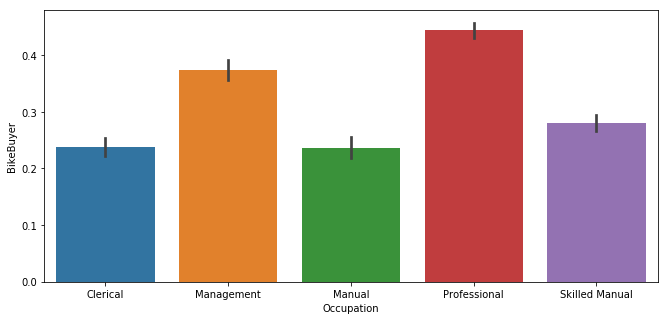

<Figure size 792x360 with 0 Axes>

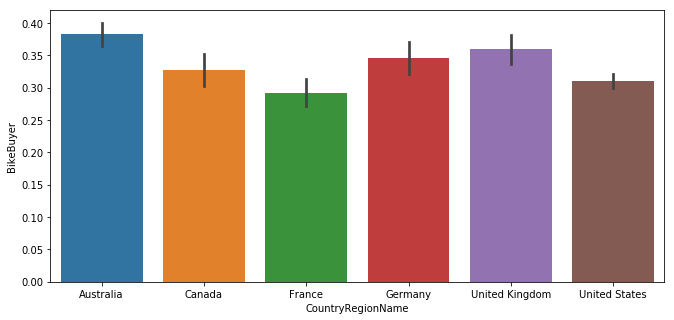

<Figure size 792x360 with 0 Axes>

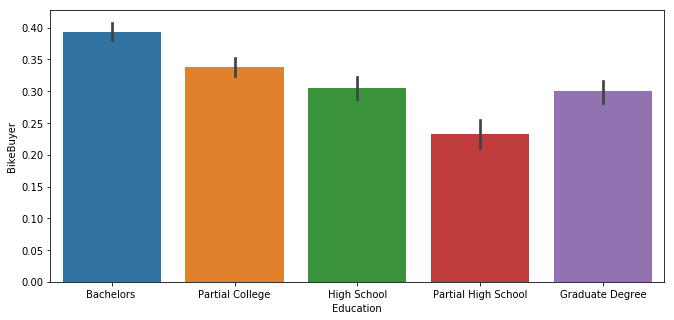

In [17]:
#Change these features into categoricals so they can be plotted.
bike['Occupation'] = pd.Categorical(bike['Occupation'])

bike['CountryRegionName'] = pd.Categorical(bike['CountryRegionName'])

cat_cols = ['Occupation', 'CountryRegionName', 'Education']
for x in cat_cols: 
    plt.figure(figsize=(11,5))
    sns.barplot(bike[x], bike['BikeBuyer'])
    plt.show()


In [18]:
# Feature engineering 

occupation_categories = {'Clerical':'Clerical_Manual', 'Management':'Management_Professional', 
                    'Manual':'Clerical_Manual', 'Professional':'Management_Professional',
                    'Skilled Manual':'Clerical_Manual'}
bike['Occupation'] = [occupation_categories[x] for x in bike['Occupation']]


country_categories = {'United Kingdom':'In_Europe', 'Germany':'In_Europe', 
                    'United States':'Not_In_Europe', 'France':'In_Europe',
                    'Canada':'Not_In_Europe', 'Australia':'Not_In_Europe'}
bike['CountryRegionName'] = [country_categories[x] for x in bike['CountryRegionName']]



education_categories = {'Bachelors ':'Bachelors_Or_Higher', 'Partial College':'Below_Bachelors', 
                    'High School':'Below_Bachelors', 'Partial High School':'Below_Bachelors',
                    'Graduate Degree':'Bachelors_Or_Higher'}
bike['Education'] = [education_categories[x] for x in bike['Education']]


<Figure size 576x360 with 0 Axes>

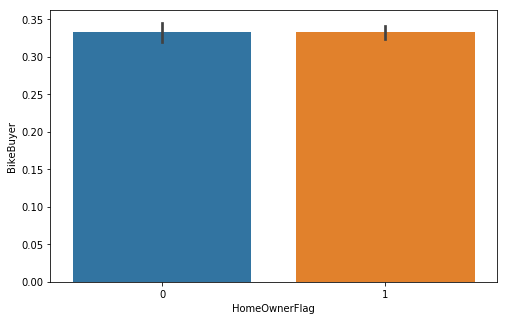

<Figure size 576x360 with 0 Axes>

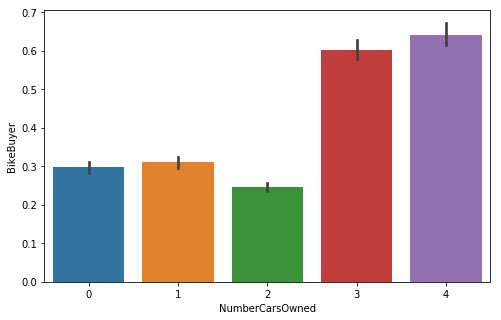

<Figure size 576x360 with 0 Axes>

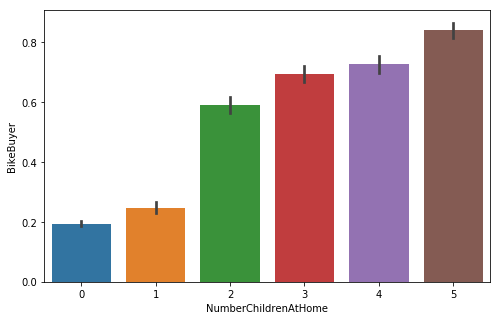

<Figure size 576x360 with 0 Axes>

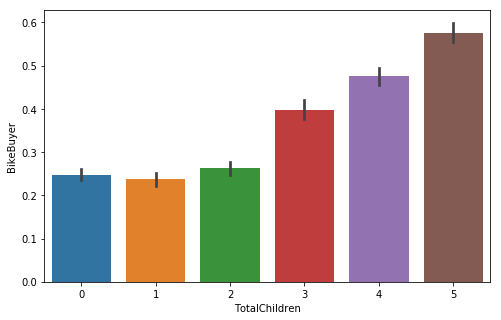

In [19]:
num_cols = ['HomeOwnerFlag','NumberCarsOwned','NumberChildrenAtHome','TotalChildren'] 

for x in num_cols: 
    plt.figure(figsize=(8,5))
    sns.barplot(bike[x], bike['BikeBuyer'])
    plt.show()

In [20]:
# One can come up with some feature engineering ideas from these plots


car_categories = {0:'Less_Than_3', 1:'Less_Than_3', 2:'Less_Than_3', 3:'3_Or_More', 4:'3_Or_More'}
bike['NumberCarsOwned'] = [car_categories[x] for x in bike['NumberCarsOwned']]



children_categories = {0:'Less_Than_2', 1:'Less_Than_2', 
                    2:'2_Or_More', 3:'2_Or_More', 4:'2_Or_More', 5:'2_Or_More'}
bike['NumberChildrenAtHome'] = [children_categories[x] for x in bike['NumberChildrenAtHome']]


# AveMonthSpend Column

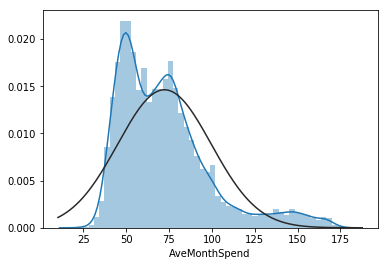

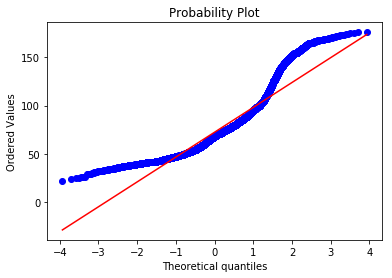

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats


sns.distplot(bike['AveMonthSpend'], fit = norm);
fig = plt.figure()
res = stats.probplot(bike['AveMonthSpend'], plot = plt)

One can see that the 'AveMonthSpend' feature is positively skewed, this can be somewhat remedied with a log transformation.

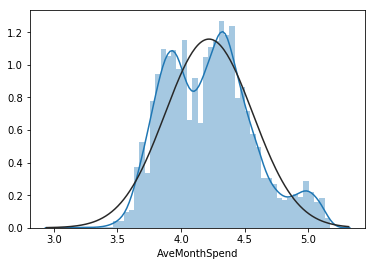

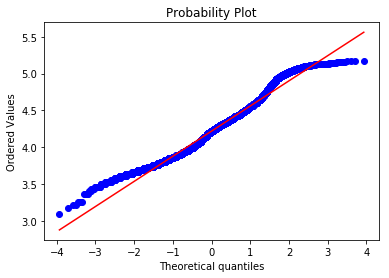

In [22]:
bike['AveMonthSpend'] = np.log(bike['AveMonthSpend'])

sns.distplot(bike['AveMonthSpend'], fit=norm);
fig = plt.figure()
res = stats.probplot(bike['AveMonthSpend'], plot=plt)

# YearlyIncome Column

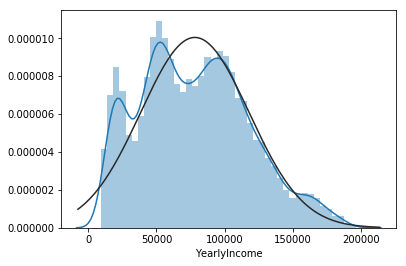

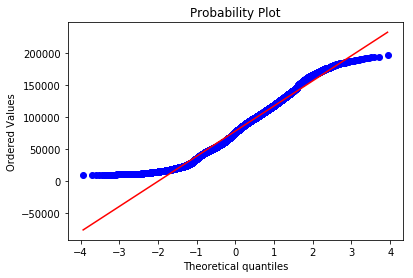

In [23]:
sns.distplot(bike['YearlyIncome'], fit = norm);
fig = plt.figure()
res = stats.probplot(( bike['YearlyIncome']) , plot = plt)

One can see that the 'YearlyIncome' feature is positively skewed. 

Let us see the result of a log transformation.

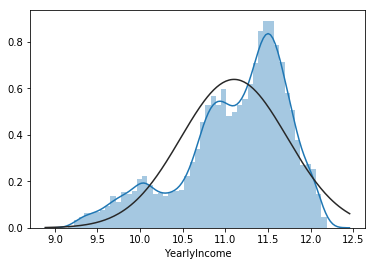

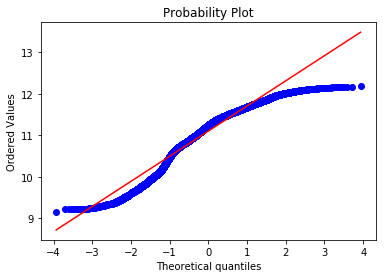

In [24]:
sns.distplot(np.log(bike['YearlyIncome']) , fit = norm);
fig = plt.figure()
res = stats.probplot(np.log( bike['YearlyIncome']) , plot = plt)

We find that the log of the 'YearlyIncome' feature is negatively skewed.

Let us try a Box-Cox transformation

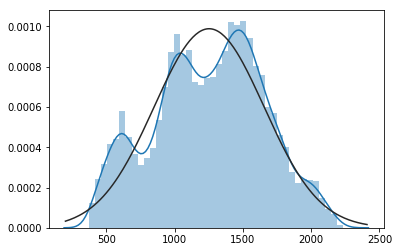

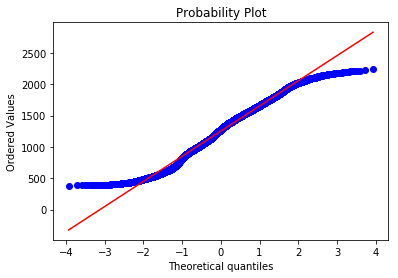

In [25]:
# trying a box cox transformation on YearlyIncome

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy import stats


bc_YI = stats.boxcox(bike['YearlyIncome'])[0]  #box-cox only works on positive values
#bc_YI = pd.DataFrame(data=bc_YI)
                          
sns.distplot(bc_YI, fit = norm);
fig = plt.figure()
res = stats.probplot(bc_YI, plot = plt)

Now let us try applying a sqrt function on the original 'YearlyIncome'.

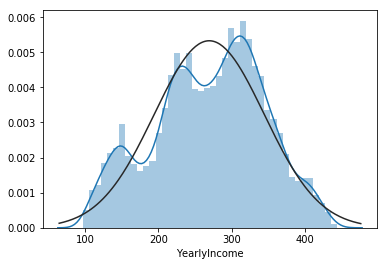

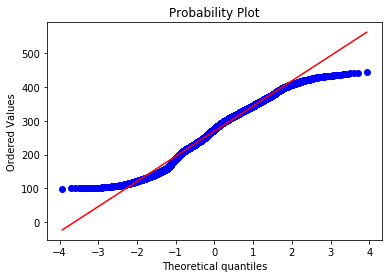

In [26]:
sns.distplot(np.sqrt(bike['YearlyIncome']) , fit = norm);
fig = plt.figure()
res = stats.probplot(np.sqrt( bike['YearlyIncome']) , plot = plt)

It's not perfect, but let's see where this takes us.

In [27]:
# Let's make sure this sqrt transformation is actually applied to the 'YearlyIncome' feature.
bike['YearlyIncome'] = np.sqrt(bike['YearlyIncome'])

# Box Plots for numerical features

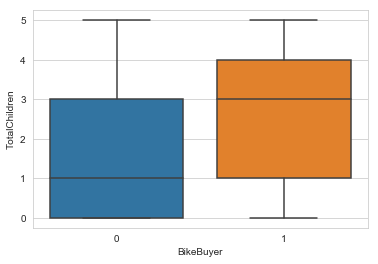

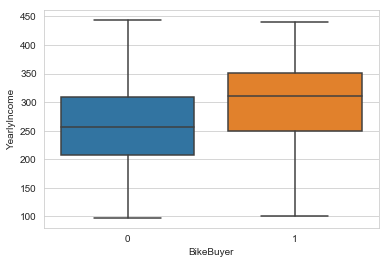

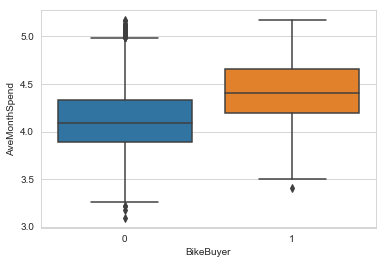

In [31]:
#plots for numerical features

def plot_box(bike, cols, col_x = 'BikeBuyer'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data = bike)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

num_cols = ['TotalChildren','YearlyIncome','AveMonthSpend']
plot_box(bike, num_cols)
    

One can start to see a few trends from these scatter plots:

   The higher the total amount of children, the more likely a bike will be purchased.
   
   People who purchase bikes tend to have a higher yearly income and average monthly spend.

# Plots for categorical features

CountryRegionName


<Figure size 720x288 with 0 Axes>

<BarContainer object of 2 artists>

([0, 1], <a list of 2 Text xticklabel objects>)

Text(0.5,1,'Counts for the CountryRegionName column\n Bike not bought')

Text(0,0.5,'count')

<BarContainer object of 2 artists>

([0, 1], <a list of 2 Text xticklabel objects>)

Text(0.5,1,'Counts for the CountryRegionName column\n Bike Bought')

Text(0,0.5,'count')

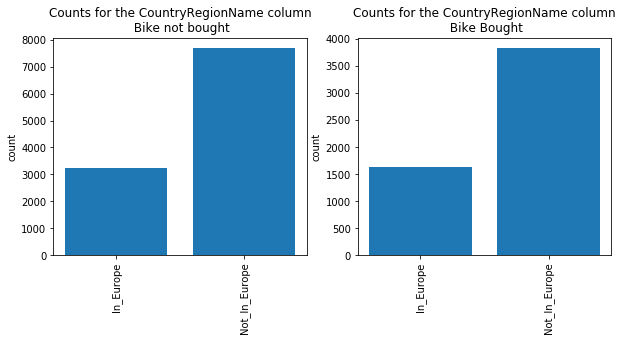

Education


<Figure size 720x288 with 0 Axes>

<BarContainer object of 2 artists>

([0, 1], <a list of 2 Text xticklabel objects>)

Text(0.5,1,'Counts for the Education column\n Bike not bought')

Text(0,0.5,'count')

<BarContainer object of 2 artists>

([0, 1], <a list of 2 Text xticklabel objects>)

Text(0.5,1,'Counts for the Education column\n Bike Bought')

Text(0,0.5,'count')

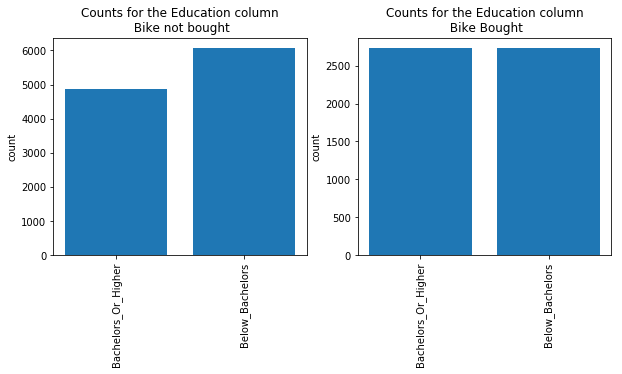

Occupation


<Figure size 720x288 with 0 Axes>

<BarContainer object of 2 artists>

([0, 1], <a list of 2 Text xticklabel objects>)

Text(0.5,1,'Counts for the Occupation column\n Bike not bought')

Text(0,0.5,'count')

<BarContainer object of 2 artists>

([0, 1], <a list of 2 Text xticklabel objects>)

Text(0.5,1,'Counts for the Occupation column\n Bike Bought')

Text(0,0.5,'count')

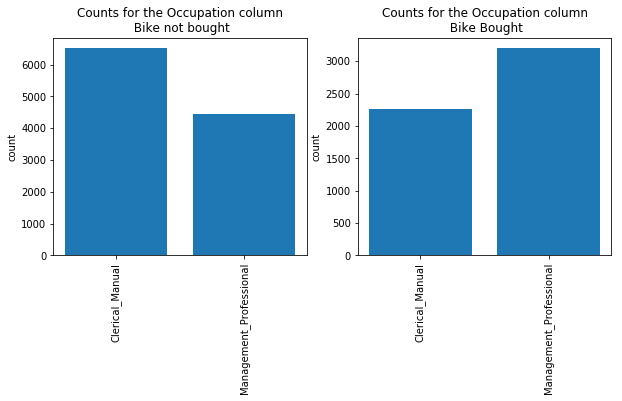

Gender


<Figure size 720x288 with 0 Axes>

<BarContainer object of 2 artists>

([0, 1], <a list of 2 Text xticklabel objects>)

Text(0.5,1,'Counts for the Gender column\n Bike not bought')

Text(0,0.5,'count')

<BarContainer object of 2 artists>

([0, 1], <a list of 2 Text xticklabel objects>)

Text(0.5,1,'Counts for the Gender column\n Bike Bought')

Text(0,0.5,'count')

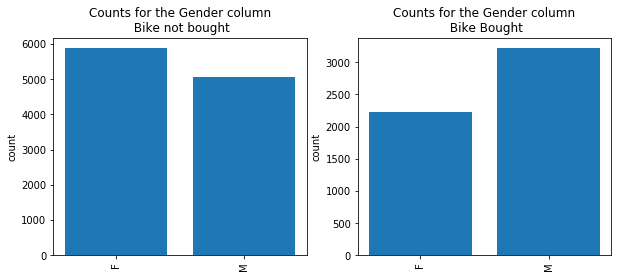

MaritalStatus


<Figure size 720x288 with 0 Axes>

<BarContainer object of 2 artists>

([0, 1], <a list of 2 Text xticklabel objects>)

Text(0.5,1,'Counts for the MaritalStatus column\n Bike not bought')

Text(0,0.5,'count')

<BarContainer object of 2 artists>

([0, 1], <a list of 2 Text xticklabel objects>)

Text(0.5,1,'Counts for the MaritalStatus column\n Bike Bought')

Text(0,0.5,'count')

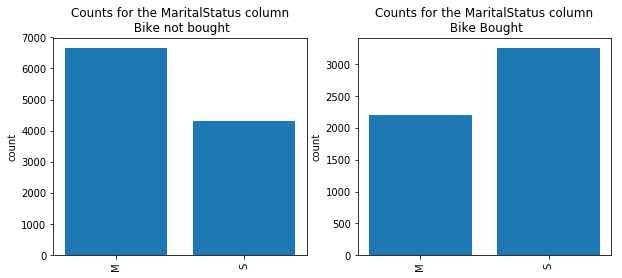

In [38]:
#plots for categorical features

cat_cols = ['CountryRegionName','Education','Occupation','Gender','MaritalStatus']

bike['dummy'] = np.ones(shape = bike.shape[0])
for col in cat_cols:
    print(col)
    counts = bike[['dummy', 'BikeBuyer', col]].groupby(['BikeBuyer', col], as_index = False).count()
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for the ' + col + ' column' + '\n Bike not bought')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp = counts[counts['BikeBuyer'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for the ' + col + ' column'+ '\n Bike Bought')
    plt.ylabel('count')
    plt.show()

From these plots of the categorical features (and noting that before any over sampling of the data, a majority of our entries consisted of users who didn't purchase a bike), one can see the following trends:

   Most of our data consists of users who aren't in Europe. Therefore, it might not be wise to draw a premature conclusion on whether geographical location influences bike purchases. 
    
   Education doesn't seem to influence whether someone will purchase a bike. But according to this data, people who don't have a bachelors degree or higher, seem less likely to purchase a bike. 

   People in 'Management' and 'Professional' occupations seem more likely to purchase a bike.
    
   Gender isn't a major factor on whether a bike is purchased, but according to this data, men seem slightly more likely to purchase a bike.
    
   If one is married, they're less likely to purchase a bike. 
                                              
                                              

# One Hot Encoding

In [43]:
#Want to drop columns that aren't relevant, or will produce too many columns when we use one hot encoding.
cols_to_drop = ['CustomerID','FirstName','LastName','AddressLine1','City','StateProvinceName','PostalCode','PhoneNumber','BirthDate', 'dummy']
bike.drop(cols_to_drop, inplace = True, axis = 1)
bike.head()



,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,Not_In_Europe,Bachelors_Or_Higher,Management_Professional,M,M,1,Less_Than_3,Less_Than_2,2,371.412170,4.488636,0
1,Not_In_Europe,Bachelors_Or_Higher,Management_Professional,M,S,0,Less_Than_3,2_Or_More,3,318.026728,4.762174,1
2,Not_In_Europe,Bachelors_Or_Higher,Management_Professional,M,M,1,Less_Than_3,2_Or_More,3,303.224339,4.812184,0
3,Not_In_Europe,Bachelors_Or_Higher,Management_Professional,F,S,0,Less_Than_3,Less_Than_2,0,294.428260,3.912023,0
4,Not_In_Europe,Bachelors_Or_Higher,Management_Professional,F,S,1,3_Or_More,2_Or_More,5,304.583322,4.553877,1


In [44]:
# one hot encoding

one_hot_df = pd.get_dummies(bike)

one_hot_df.head()

,HomeOwnerFlag,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,CountryRegionName_In_Europe,CountryRegionName_Not_In_Europe,Education_Bachelors_Or_Higher,Education_Below_Bachelors,Occupation_Clerical_Manual,Occupation_Management_Professional,Gender_F,Gender_M,MaritalStatus_M,MaritalStatus_S,NumberCarsOwned_3_Or_More,NumberCarsOwned_Less_Than_3,NumberChildrenAtHome_2_Or_More,NumberChildrenAtHome_Less_Than_2
0,1,2,371.412170,4.488636,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1
1,0,3,318.026728,4.762174,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0
2,1,3,303.224339,4.812184,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0
3,0,0,294.428260,3.912023,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1
4,1,5,304.583322,4.553877,1,0,1,1,0,0,1,1,0,0,1,1,0,1,0


In [45]:
one_hot_df.drop(['TotalChildren'], axis=1, inplace=True)


In [46]:
one_hot_df.head()

,HomeOwnerFlag,YearlyIncome,AveMonthSpend,BikeBuyer,CountryRegionName_In_Europe,CountryRegionName_Not_In_Europe,Education_Bachelors_Or_Higher,Education_Below_Bachelors,Occupation_Clerical_Manual,Occupation_Management_Professional,Gender_F,Gender_M,MaritalStatus_M,MaritalStatus_S,NumberCarsOwned_3_Or_More,NumberCarsOwned_Less_Than_3,NumberChildrenAtHome_2_Or_More,NumberChildrenAtHome_Less_Than_2
0,1,371.412170,4.488636,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1
1,0,318.026728,4.762174,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0
2,1,303.224339,4.812184,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0
3,0,294.428260,3.912023,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1
4,1,304.583322,4.553877,1,0,1,1,0,0,1,1,0,0,1,1,0,1,0


In [47]:
#view all columns in a nicer way
list(one_hot_df)

['HomeOwnerFlag',
 'YearlyIncome',
 'AveMonthSpend',
 'BikeBuyer',
 'CountryRegionName_In_Europe',
 'CountryRegionName_Not_In_Europe',
 'Education_Bachelors_Or_Higher',
 'Education_Below_Bachelors',
 'Occupation_Clerical_Manual',
 'Occupation_Management_Professional',
 'Gender_F',
 'Gender_M',
 'MaritalStatus_M',
 'MaritalStatus_S',
 'NumberCarsOwned_3_Or_More',
 'NumberCarsOwned_Less_Than_3',
 'NumberChildrenAtHome_2_Or_More',
 'NumberChildrenAtHome_Less_Than_2']

In [48]:
one_hot_df.corr()

,HomeOwnerFlag,YearlyIncome,AveMonthSpend,BikeBuyer,CountryRegionName_In_Europe,CountryRegionName_Not_In_Europe,Education_Bachelors_Or_Higher,Education_Below_Bachelors,Occupation_Clerical_Manual,Occupation_Management_Professional,Gender_F,Gender_M,MaritalStatus_M,MaritalStatus_S,NumberCarsOwned_3_Or_More,NumberCarsOwned_Less_Than_3,NumberChildrenAtHome_2_Or_More,NumberChildrenAtHome_Less_Than_2
HomeOwnerFlag,1.000000,0.088015,0.145162,0.000211,-0.021798,0.021798,0.111558,-0.111558,-0.034377,0.034377,0.003725,-0.003725,0.322482,-0.322482,0.035499,-0.035499,0.124312,-0.124312
YearlyIncome,0.088015,1.000000,0.585904,0.272953,-0.352969,0.352969,0.395420,-0.395420,-0.698069,0.698069,-0.150380,0.150380,0.136511,-0.136511,0.434818,-0.434818,0.283424,-0.283424
AveMonthSpend,0.145162,0.585904,1.000000,0.412402,-0.067654,0.067654,0.084194,-0.084194,-0.359332,0.359332,-0.630937,0.630937,0.227772,-0.227772,0.428445,-0.428445,0.620733,-0.620733
BikeBuyer,0.000211,0.272953,0.412402,1.000000,0.000905,-0.000905,0.050777,-0.050777,-0.171044,0.171044,-0.120405,0.120405,-0.193315,0.193315,0.261880,-0.261880,0.457822,-0.457822
CountryRegionName_In_Europe,-0.021798,-0.352969,-0.067654,0.000905,1.000000,-1.000000,-0.145275,0.145275,0.332455,-0.332455,-0.005959,0.005959,-0.064956,0.064956,-0.028652,0.028652,0.071141,-0.071141
CountryRegionName_Not_In_Europe,0.021798,0.352969,0.067654,-0.000905,-1.000000,1.000000,0.145275,-0.145275,-0.332455,0.332455,0.005959,-0.005959,0.064956,-0.064956,0.028652,-0.028652,-0.071141,0.071141
Education_Bachelors_Or_Higher,0.111558,0.395420,0.084194,0.050777,-0.145275,0.145275,1.000000,-1.000000,-0.314210,0.314210,0.003745,-0.003745,0.085103,-0.085103,0.036873,-0.036873,-0.046850,0.046850
Education_Below_Bachelors,-0.111558,-0.395420,-0.084194,-0.050777,0.145275,-0.145275,-1.000000,1.000000,0.314210,-0.314210,-0.003745,0.003745,-0.085103,0.085103,-0.036873,0.036873,0.046850,-0.046850
Occupation_Clerical_Manual,-0.034377,-0.698069,-0.359332,-0.171044,0.332455,-0.332455,-0.314210,0.314210,1.000000,-1.000000,-0.006840,0.006840,-0.089560,0.089560,-0.365119,0.365119,-0.220723,0.220723
Occupation_Management_Professional,0.034377,0.698069,0.359332,0.171044,-0.332455,0.332455,0.314210,-0.314210,-1.000000,1.000000,0.006840,-0.006840,0.089560,-0.089560,0.365119,-0.365119,0.220723,-0.220723


# Oversampling to solve class imbalance of the target variable

In [49]:
bike = one_hot_df
bike = bike.sample(frac = 1).reset_index(drop = True)

In [50]:
# We want our test size to be 25% of the data; therefore our training data is 75% of the data
t = int(0.75 * bike.shape[0]) 
training_data = bike.iloc[:t]
testing_data = bike.iloc[t:]

In [51]:
training_data.shape
testing_data.shape

(12303, 18)

(4101, 18)

0    8168
Name: BikeBuyer, dtype: int64

1    4135
Name: BikeBuyer, dtype: int64

Random over-sampling:
1    8168
0    8168
Name: BikeBuyer, dtype: int64


,HomeOwnerFlag,YearlyIncome,AveMonthSpend,BikeBuyer,CountryRegionName_In_Europe,CountryRegionName_Not_In_Europe,Education_Bachelors_Or_Higher,Education_Below_Bachelors,Occupation_Clerical_Manual,Occupation_Management_Professional,Gender_F,Gender_M,MaritalStatus_M,MaritalStatus_S,NumberCarsOwned_3_Or_More,NumberCarsOwned_Less_Than_3,NumberChildrenAtHome_2_Or_More,NumberChildrenAtHome_Less_Than_2
0,1,253.381136,4.488636,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1
1,0,166.751312,4.189655,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1
2,1,247.127497,4.304065,1,1,0,1,0,1,0,0,1,1,0,0,1,0,1
3,0,238.746728,4.219508,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1
4,1,396.782056,5.123964,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0


1    8168
0    8168
Name: BikeBuyer, dtype: int64

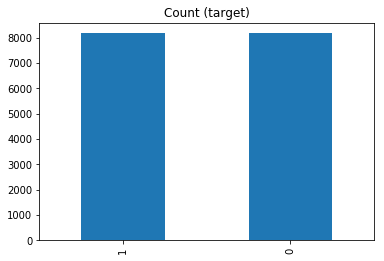

In [53]:
# Resampling

bike = training_data

# Class count
count_class_0, count_class_1 = bike.BikeBuyer.value_counts()

# Divide by class
df_class_0 = bike[bike['BikeBuyer'] == 0]
df_class_1 = bike[bike['BikeBuyer'] == 1]

#check that we have actually split up the 0 and 1 data points from the BikeBuyer column
df_class_0.BikeBuyer.value_counts()
df_class_1.BikeBuyer.value_counts()



df_class_1_over = df_class_1.sample(count_class_0, replace=True) 
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.BikeBuyer.value_counts())

df_test_over.BikeBuyer.value_counts().plot(kind='bar', title='Count (target)')

bike = df_test_over.sample(frac=1).reset_index(drop=True)

bike.head()

bike.BikeBuyer.value_counts()

# Training and Test Sets

In [55]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


# Avoid data leakage by removing columns that are essentially repetitive
big_cols_to_drop = ['Gender_F','MaritalStatus_M', 'BikeBuyer', 'CountryRegionName_Not_In_Europe',
                    'Education_Bachelors_Or_Higher', 'NumberCarsOwned_Less_Than_3','NumberChildrenAtHome_Less_Than_2']


y_train = bike.BikeBuyer
X_train = bike.drop(big_cols_to_drop, axis=1)

y_test = testing_data.BikeBuyer
X_test = testing_data.drop(big_cols_to_drop, axis=1)



In [56]:
#X_train.dtypes

In [57]:
# Create this copy, so we can easily extract the feature names later on, when examining permutation importance

df_name = X_train.copy()

# Scaling the data

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

/Users/zum/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/zum/anaconda2/lib/python2.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/zum/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  import sys


# Functions for Machine Learning performance metrics

In [59]:
# Model Plotting Functions


def plot_confusion_matrix(models):
    for m in models:
        model = m['model']

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        model_accuracy = accuracy_score(y_pred, y_test)
        print('{} accuracy is {}'.format(m['label'], model_accuracy))
        
        cm = confusion_matrix(y_test,y_pred)
        print(cm)
        print(classification_report(y_test,y_pred))

        sns.heatmap(cm, annot = True, fmt = "d") 
        plt.show()
        
        
def plot_ROC_curve(models):
    # Below for loop iterates through your models list
    for m in models:
        model = m['model'] # select the model
        model.fit(X_train, y_train) # train the model
        y_pred = model.predict(X_test) # predict the test data

    # Compute False postive rate, and True positive rate
        fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])

    # Calculate Area under the curve to display on the plot
        auc = metrics.roc_auc_score(y_test,model.predict(X_test))

    # Now, plot the computed values
        plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

    # Custom settings for the plot 
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc = "lower right")
    plt.show()   # Display
    
    
    
    
def plot_PR_curve(models):
    for m in models:
        model = m['model']

        model.fit(X_train, y_train)
        
        print('{}'.format(m['label']))
        
        # predict probabilities
        probs = model.predict_proba(X_test)

        # keep probabilities for the positive outcome only
        probs = probs[:, 1]

        # predict class values
        y_hat = model.predict(X_test)


        # calculate precision-recall curve
        precision, recall, thresholds = precision_recall_curve(y_test, probs)


        # calculate F1 score
        f1 = f1_score(y_test, y_hat)

        # calculate precision-recall AUC
        the_auc = auc(recall, precision)

        # calculate average precision score
        ap = average_precision_score(y_test, probs)
        print('f1=%.3f auc=%.3f ap=%.3f' % (f1, the_auc, ap))


        plt.figure(figsize = [8,7])

        # plot no skill (the blue line)
        plt.plot([0, 1], [0.1, 0.1], linestyle='--')

        # plot the precision-recall curve for the model
        plt.plot(recall, precision, marker='.', label = '%s ROC (area = %0.2f)' % (m['label'], the_auc))

        #legend
        plt.legend(loc = 'best')    
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision Recall Curve')

        # show the plot
        plt.show()
        


# KNN Gridsearch

In [61]:
# KNN gridsearch

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv = 3) # GridSearchCV
knn_cv.fit(X_train, y_train)# Fit

# Print hyperparameter
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))

optimised_knn = knn_cv.best_estimator_


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Tuned hyperparameter k: {'n_neighbors': 1}
Best score: 0.834843290891


# Logistic Regression Gridsearch

In [63]:
#Logistic Regression Grid

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Hyperparameter grid
param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid, cv = 3)
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned hyperparameters : {}".format(logreg_cv.best_params_))
print("Best Accuracy: {}".format(logreg_cv.best_score_))

optimised_logreg = logreg_cv.best_estimator_

/Users/zum/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Tuned hyperparameters : {'penalty': 'l2', 'C': 0.01}
Best Accuracy: 0.750489715965


#  Random Forest Gridsearch

In [68]:
# Random Forest Gridsearch - [WARNING: This one takes a while to run]

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

#Create a random hyperparameter grid
#To use RandomizedSearchCV, we first need to create a parameter grid to sample from during fitting

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]  #min of 200, max of 2000 and 10 values in between

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]  #so a min of 10, a max of 100; but 11 values in between
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]  #we want to try out trees with these values for the min_samples_split

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)



#However, the benefit of a random search is that we are not trying every combination, but selecting at random, to 
#sample a wide range of values.




# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

#Random search of parameters, using 3 fold cross validation (cv) and search across 50 different combinations (n_iter) 
#and use all available cores (n_jobs= -1)

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2,
                               random_state=42, n_jobs = -1)


# Fit the random search model
rf_random.fit(X_train, y_train)


#The most important arguments in RandomizedSearchCV are n_iter, which controls the number of different combinations
#to try, and cv which is the number of folds to use for cross validation.
#More iterations will cover a wider search space and more cv folds reduces the chances of overfitting, but raising 
#each will increase the run time. 
#Machine learning is a field of trade-offs, and performance vs time is one of the most fundamental.


# store the best model parameters 
optimised_rf = rf_random.best_estimator_

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 26.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_split': [2, 5, 10], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

# Confusion Matrix, ROC Curves and Precision Recall Curves


KNN accuracy is 0.733967325043
[[2255  526]
 [ 565  755]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      2781
           1       0.59      0.57      0.58      1320

   micro avg       0.73      0.73      0.73      4101
   macro avg       0.69      0.69      0.69      4101
weighted avg       0.73      0.73      0.73      4101



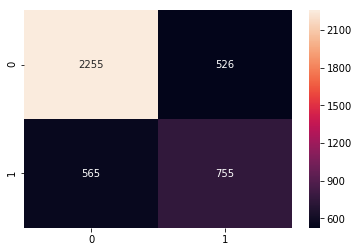

Random Forest accuracy is 0.754450134114
[[2292  489]
 [ 518  802]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      2781
           1       0.62      0.61      0.61      1320

   micro avg       0.75      0.75      0.75      4101
   macro avg       0.72      0.72      0.72      4101
weighted avg       0.75      0.75      0.75      4101



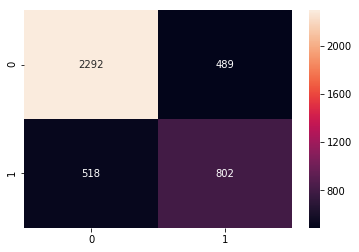

Logistic Regression accuracy is 0.768593026091
[[2213  568]
 [ 381  939]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      2781
           1       0.62      0.71      0.66      1320

   micro avg       0.77      0.77      0.77      4101
   macro avg       0.74      0.75      0.74      4101
weighted avg       0.78      0.77      0.77      4101



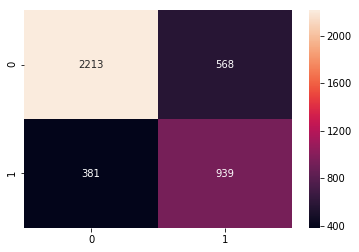

Gradient Boosting Classifier accuracy is 0.774689100219
[[2257  524]
 [ 400  920]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2781
           1       0.64      0.70      0.67      1320

   micro avg       0.77      0.77      0.77      4101
   macro avg       0.74      0.75      0.75      4101
weighted avg       0.78      0.77      0.78      4101



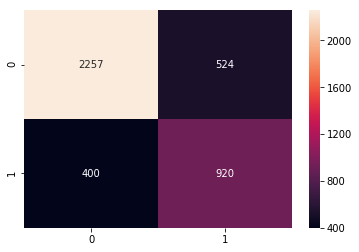

/Users/zum/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Extra Trees Classifier accuracy is 0.752499390393
[[2374  407]
 [ 608  712]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82      2781
           1       0.64      0.54      0.58      1320

   micro avg       0.75      0.75      0.75      4101
   macro avg       0.72      0.70      0.70      4101
weighted avg       0.74      0.75      0.75      4101



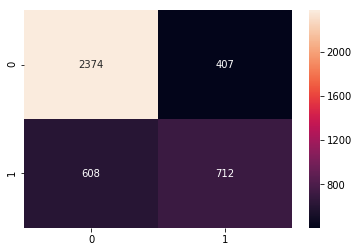

SGDC Classifier (log) accuracy is 0.76664228237
[[2193  588]
 [ 369  951]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      2781
           1       0.62      0.72      0.67      1320

   micro avg       0.77      0.77      0.77      4101
   macro avg       0.74      0.75      0.74      4101
weighted avg       0.78      0.77      0.77      4101



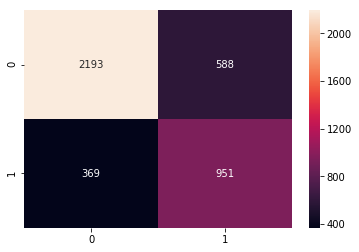

SGDC Classifier (m_huber) accuracy is 0.782248232139
[[2355  426]
 [ 467  853]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      2781
           1       0.67      0.65      0.66      1320

   micro avg       0.78      0.78      0.78      4101
   macro avg       0.75      0.75      0.75      4101
weighted avg       0.78      0.78      0.78      4101



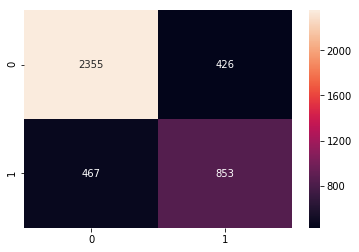

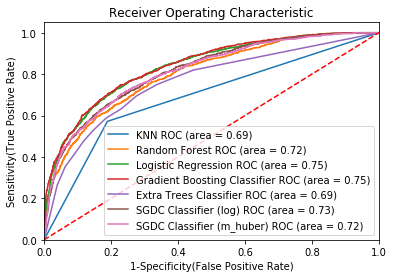

KNN
f1=0.581 auc=0.650 ap=0.475


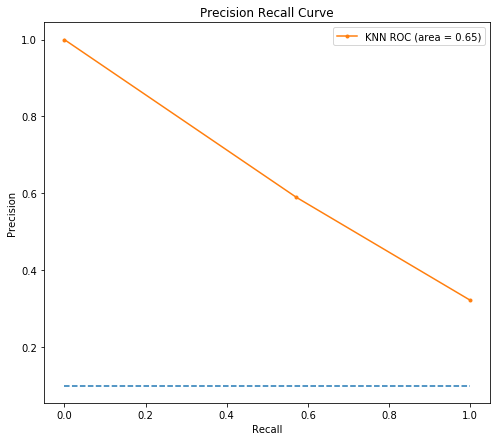

Random Forest
f1=0.616 auc=0.688 ap=0.688


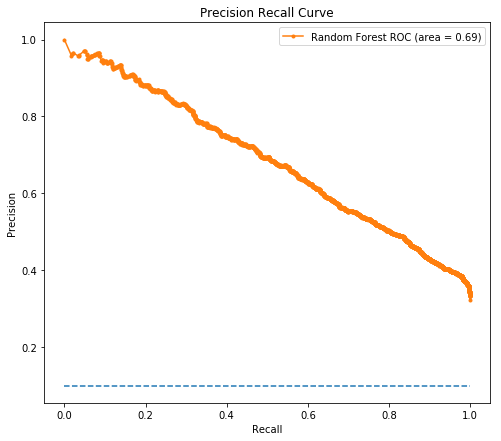

Logistic Regression
f1=0.664 auc=0.734 ap=0.734


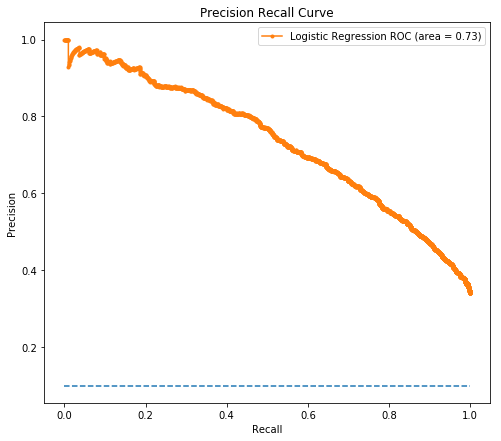

Gradient Boosting Classifier
f1=0.666 auc=0.746 ap=0.746


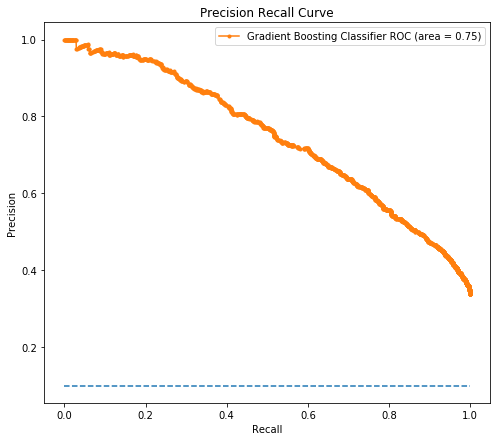

Extra Trees Classifier
f1=0.578 auc=0.655 ap=0.603


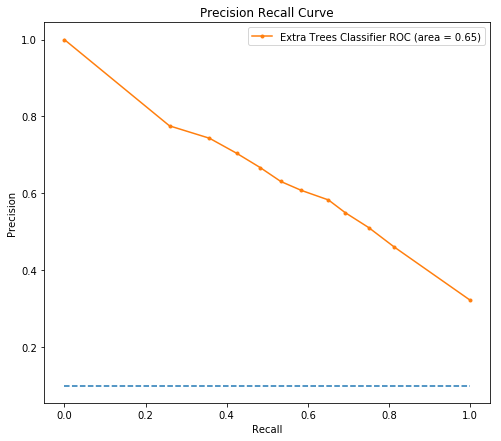

SGDC Classifier (log)
f1=0.664 auc=0.723 ap=0.723


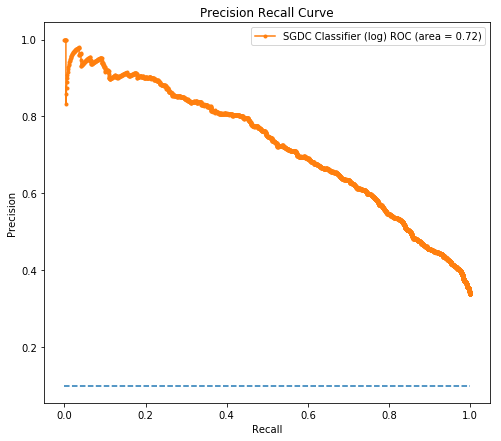

SGDC Classifier (m_huber)
f1=0.630 auc=0.697 ap=0.684


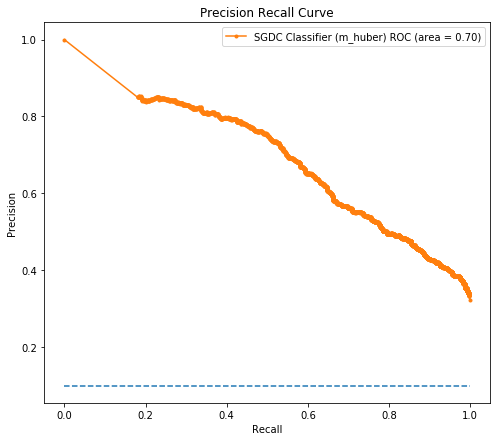

In [73]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot as plt
from scipy.stats import itemfreq
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn import metrics




models = [
 {'label': 'KNN', 'model': optimised_knn},
 {'label': 'Random Forest', 'model': optimised_rf},
 {'label': 'Logistic Regression', 'model': optimised_logreg},
 {'label': 'Gradient Boosting Classifier', 'model': GradientBoostingClassifier()},
 {'label': 'Extra Trees Classifier', 'model': ExtraTreesClassifier()},
 {'label': 'SGDC Classifier (log)', 'model' : SGDClassifier(max_iter=1000, tol=1e-3, class_weight = "balanced", loss= 'log')},
 {'label': 'SGDC Classifier (m_huber)', 'model' : SGDClassifier(max_iter=1000, tol=1e-3, class_weight = "balanced", loss= 'modified_huber')},
 ]

plot_confusion_matrix(models)

plot_ROC_curve(models)

plot_PR_curve(models)



# Permutation Importance 

In [74]:
# Permutation importance 

import eli5
from eli5.sklearn import PermutationImportance
      
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    print('{}'.format(m['label']))
    perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)    
    eli5.show_weights(perm, feature_names = df_name.columns.tolist())
# df_name is a copy of the X_train dataframe before it becomes an array; so we can isolate the feature names

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

KNN


Weight,Feature
0.0754 ± 0.0027,NumberChildrenAtHome_2_Or_More
0.0429 ± 0.0093,AveMonthSpend
0.0385 ± 0.0076,MaritalStatus_S
0.0245 ± 0.0146,YearlyIncome
0.0156 ± 0.0077,CountryRegionName_In_Europe
0.0070 ± 0.0041,Education_Below_Bachelors
0.0013 ± 0.0086,Gender_M
0.0007 ± 0.0019,Occupation_Clerical_Manual
0.0004 ± 0.0026,Occupation_Management_Professional
-0.0002 ± 0.0015,NumberCarsOwned_3_Or_More


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Random Forest


Weight,Feature
0.0765 ± 0.0073,AveMonthSpend
0.0548 ± 0.0088,NumberChildrenAtHome_2_Or_More
0.0441 ± 0.0070,MaritalStatus_S
0.0120 ± 0.0077,YearlyIncome
0.0040 ± 0.0041,Education_Below_Bachelors
0.0035 ± 0.0050,CountryRegionName_In_Europe
0.0022 ± 0.0055,NumberCarsOwned_3_Or_More
-0.0045 ± 0.0033,Occupation_Clerical_Manual
-0.0057 ± 0.0057,HomeOwnerFlag
-0.0065 ± 0.0071,Gender_M


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Logistic Regression


Weight,Feature
0.1400 ± 0.0084,AveMonthSpend
0.0744 ± 0.0079,MaritalStatus_S
0.0366 ± 0.0061,NumberChildrenAtHome_2_Or_More
0.0153 ± 0.0054,Gender_M
0.0104 ± 0.0035,YearlyIncome
0.0012 ± 0.0024,Education_Below_Bachelors
0.0011 ± 0.0017,CountryRegionName_In_Europe
0.0004 ± 0.0011,HomeOwnerFlag
-0.0003 ± 0.0011,NumberCarsOwned_3_Or_More
-0.0006 ± 0.0015,Occupation_Clerical_Manual


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

Gradient Boosting Classifier


Weight,Feature
0.1032 ± 0.0064,AveMonthSpend
0.0638 ± 0.0100,MaritalStatus_S
0.0620 ± 0.0058,NumberChildrenAtHome_2_Or_More
0.0127 ± 0.0054,YearlyIncome
0.0015 ± 0.0025,CountryRegionName_In_Europe
0.0004 ± 0.0020,HomeOwnerFlag
0.0000 ± 0.0002,NumberCarsOwned_3_Or_More
0.0000 ± 0.0004,Occupation_Management_Professional
-0.0003 ± 0.0014,Occupation_Clerical_Manual
-0.0005 ± 0.0005,Education_Below_Bachelors


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Extra Trees Classifier


Weight,Feature
0.0731 ± 0.0028,NumberChildrenAtHome_2_Or_More
0.0497 ± 0.0062,AveMonthSpend
0.0412 ± 0.0100,MaritalStatus_S
0.0136 ± 0.0095,YearlyIncome
0.0129 ± 0.0058,CountryRegionName_In_Europe
0.0087 ± 0.0044,Education_Below_Bachelors
0.0043 ± 0.0031,NumberCarsOwned_3_Or_More
0.0015 ± 0.0016,Occupation_Management_Professional
-0.0015 ± 0.0047,Gender_M
-0.0019 ± 0.0083,HomeOwnerFlag


SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

SGDC Classifier (log)


Weight,Feature
0.2003 ± 0.0154,AveMonthSpend
0.0935 ± 0.0093,MaritalStatus_S
0.0485 ± 0.0050,Gender_M
0.0055 ± 0.0030,YearlyIncome
0.0043 ± 0.0020,HomeOwnerFlag
0.0033 ± 0.0056,Education_Below_Bachelors
0.0029 ± 0.0023,CountryRegionName_In_Europe
0.0024 ± 0.0013,NumberChildrenAtHome_2_Or_More
0.0007 ± 0.0010,Occupation_Management_Professional
0.0006 ± 0.0019,NumberCarsOwned_3_Or_More


SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='modified_huber',
       max_iter=1000, n_iter=None, n_iter_no_change=5, n_jobs=None,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)

SGDC Classifier (m_huber)


Weight,Feature
0.1622 ± 0.0091,AveMonthSpend
0.0767 ± 0.0120,MaritalStatus_S
0.0319 ± 0.0042,Gender_M
0.0169 ± 0.0037,NumberChildrenAtHome_2_Or_More
-0.0003 ± 0.0009,CountryRegionName_In_Europe
-0.0009 ± 0.0021,Occupation_Management_Professional
-0.0010 ± 0.0029,HomeOwnerFlag
-0.0013 ± 0.0023,Occupation_Clerical_Manual
-0.0024 ± 0.0051,NumberCarsOwned_3_Or_More
-0.0051 ± 0.0020,YearlyIncome


# Voting Classifier

0.77
[[2314  467]
 [ 478  842]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      2781
           1       0.64      0.64      0.64      1320

   micro avg       0.77      0.77      0.77      4101
   macro avg       0.74      0.73      0.74      4101
weighted avg       0.77      0.77      0.77      4101



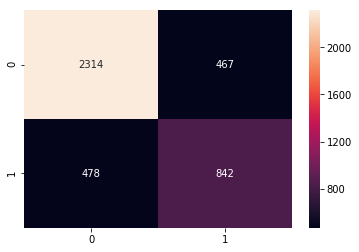

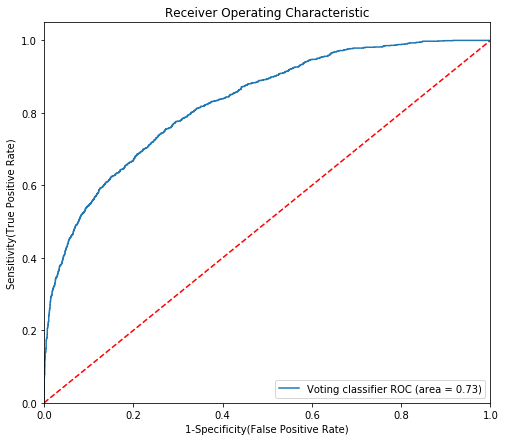

Voting Classifier
f1=0.654 auc=0.744 ap=0.744


<Figure size 576x504 with 0 Axes>

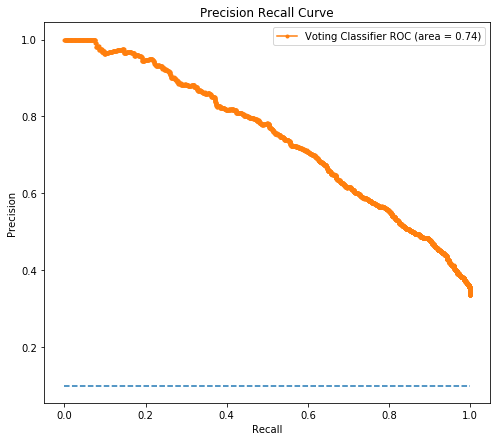

In [75]:
# Voting Classifier

from sklearn.ensemble import VotingClassifier


def plot_voting_classifier():
    voting_classifier = VotingClassifier(estimators=[
    ('KNN', optimised_knn),
    ('Random Forest', optimised_rf),
    ('Logistic Regression', optimised_logreg),
    ('Gradient Boosting Classifier', GradientBoostingClassifier()),
    ('Extra Trees Classifier', ExtraTreesClassifier()),
    ('SGDC Classifier (log)', SGDClassifier(max_iter=1000, tol=1e-3, class_weight = "balanced", loss= 'log')),
    ('SGDC Classifier (m_huber)', SGDClassifier(max_iter=1000, tol=1e-3, class_weight = "balanced", loss= 'modified_huber'))
        ],voting='soft')


    voting_classifier = voting_classifier.fit(X_train, y_train)
    y_pred = voting_classifier.predict(X_test)
    voting_accy = round(accuracy_score(y_pred, y_test), 3)
    print(voting_accy)

    cm = confusion_matrix(y_test,y_pred)
    print(cm)
    print(classification_report(y_test,y_pred))
    sns.heatmap(cm, annot = True, fmt = "d") 
    plt.show()

    # ROC curve
    plt.figure(figsize = [8,7])
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, voting_classifier.predict_proba(X_test)[:,1])
    # Calculate Area under the curve to display on the plot
    ROC_auc = metrics.roc_auc_score(y_test,voting_classifier.predict(X_test))
    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('Voting classifier', ROC_auc))
    # Custom settings for the plot 
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc = "lower right")
    plt.show()   


    #Precision Recall Curve
    plt.figure(figsize = [8,7])
    # predict probabilities
    probs = voting_classifier.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # predict class values
    y_hat = voting_classifier.predict(X_test)
    # calculate precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, probs)
    f1 = f1_score(y_test, y_hat)



plot_voting_classifier()



# precision-recall curve and auc for the Voting Classifier

voting_classifier = VotingClassifier(estimators=[
('KNN', optimised_knn),
('Random Forest', optimised_rf),
('Logistic Regression', optimised_logreg),
('Gradient Boosting Classifier', GradientBoostingClassifier()),
('Extra Trees Classifier', ExtraTreesClassifier()),
('SGDC Classifier (log)', SGDClassifier(max_iter=1000, tol=1e-3, class_weight = "balanced", loss= 'log')),
('SGDC Classifier (m_huber)', SGDClassifier(max_iter=1000, tol=1e-3, class_weight = "balanced", loss= 'modified_huber'))
    ],voting='soft')

models = [{'label': 'Voting Classifier', 'model' : voting_classifier}]

plot_PR_curve(models)

In [76]:
#Voting Classifier permutation importance
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(voting_classifier, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = df_name.columns.tolist())

Weight,Feature
0.1287 ± 0.0118,AveMonthSpend
0.0636 ± 0.0054,MaritalStatus_S
0.0245 ± 0.0068,NumberChildrenAtHome_2_Or_More
0.0088 ± 0.0060,Gender_M
0.0013 ± 0.0037,NumberCarsOwned_3_Or_More
-0.0001 ± 0.0076,YearlyIncome
-0.0002 ± 0.0028,Occupation_Management_Professional
-0.0004 ± 0.0029,CountryRegionName_In_Europe
-0.0018 ± 0.0037,HomeOwnerFlag
-0.0019 ± 0.0026,Education_Below_Bachelors
